verify file structures

In [5]:
# Printing the content of the main dataset directory
print("Listing contents of /kaggle/input/dataset1-thyroid-cancer:")
!ls /kaggle/input/dataset1-thyroid-cancer

# Printing the content of the test directory
print("\nListing contents of /kaggle/input/dataset1-thyroid-cancer/test:")
!ls /kaggle/input/dataset1-thyroid-cancer/test

# Printing the content of the validation directory
print("\nListing contents of /kaggle/input/dataset1-thyroid-cancer/valid:")
!ls /kaggle/input/dataset1-thyroid-cancer/valid

# Printing the content of the train directory
print("\nListing contents of /kaggle/input/dataset1-thyroid-cancer/train:")
!ls /kaggle/input/dataset1-thyroid-cancer/train

# Printing the content of the test images directory
print("\nListing contents of /kaggle/input/dataset1-thyroid-cancer/test/images:")
!ls /kaggle/input/dataset1-thyroid-cancer/test/images

# Printing the content of the test labels directory
print("\nListing contents of /kaggle/input/dataset1-thyroid-cancer/test/labels:")
!ls /kaggle/input/dataset1-thyroid-cancer/test/labels


Listing contents of /kaggle/input/dataset1-thyroid-cancer:
data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid

Listing contents of /kaggle/input/dataset1-thyroid-cancer/test:
images	labels

Listing contents of /kaggle/input/dataset1-thyroid-cancer/valid:
images	labels

Listing contents of /kaggle/input/dataset1-thyroid-cancer/train:
images	labels

Listing contents of /kaggle/input/dataset1-thyroid-cancer/test/images:
IMG_7394_jpg.rf.bf9cfbb6130959917bb0407c611f6fdd.jpg
IMG_7478_jpg.rf.d90731c14273c212a7a155fdd53af83b.jpg
TCGA-BJ-A0Z9-01Z-00-DX1_136_jpg.rf.fbbf5d405151288122148f1e27c2c747.jpg
TCGA-BJ-A0ZC-01Z-00-DX1_209_jpg.rf.3af3e5c7b4fbd2941811ff8d6f967f40.jpg
TCGA-BJ-A0ZC-01Z-00-DX1_391_jpg.rf.33d9f9de831f3c6fb53865edc4f64da2.jpg
TCGA-BJ-A0ZF-01Z-00-DX1_337_jpg.rf.ba4694d6b6d2579510a357f1de3c3f2e.jpg
TCGA-BJ-A0ZH-01Z-00-DX1_1_jpg.rf.09d8947b838dd103d4b00e846a655563.jpg
TCGA-BJ-A0ZH-01Z-00-DX1_534_jpg.rf.9310cb9609527857c32b5d602d0b2657.jpg
TCGA-BJ-A28V-01Z-00-DX1

**Exploratory Data Analysis (EDA)**
Each dataset may have different characteristics, so first, we:

1.✅ Understand dataset structure (Check file formats, class distributions, missing data, etc.).
2. ✅ Visualize sample images (Ensure images are readable and have correct bounding boxes).
3. ✅ Check label distribution (Identify imbalance issues).
4. ✅ Verify dataset integrity (Detect corrupted images, misaligned labels).
**to do**
* Plot bounding boxes on images to check if labels are correct.
* Count class distributions (e.g., normal vs. cancerous images).
* Identify missing values or annotation errors.

**Step 1: Basic Dataset Overview**

1. Count number of images in train, val, test.
2. Count number of annotation files (should match the number of images).
3. Check if any images are missing annotations.


In [10]:
import os

# Define dataset paths
dataset_path = "/kaggle/input/dataset1-thyroid-cancer"
splits = ["train", "valid", "test"]

for split in splits:
    image_dir = os.path.join(dataset_path, split, "images")
    label_dir = os.path.join(dataset_path, split, "labels")

    num_images = len([f for f in os.listdir(image_dir) if f.endswith(".jpg")])
    num_labels = len([f for f in os.listdir(label_dir) if f.endswith(".txt")])

    print(f"{split.upper()} SET:")
    print(f"  Images: {num_images}")
    print(f"  Labels: {num_labels}")
    print(f"  Missing labels: {num_images - num_labels}\n")


TRAIN SET:
  Images: 549
  Labels: 549
  Missing labels: 0

VALID SET:
  Images: 102
  Labels: 102
  Missing labels: 0

TEST SET:
  Images: 44
  Labels: 44
  Missing labels: 0



**Step 2: Label Distribution Analysis**
1. Read data.yaml (class names).
2. Count occurrences of each class in the dataset.
3. Visualize class distribution as a bar chart.


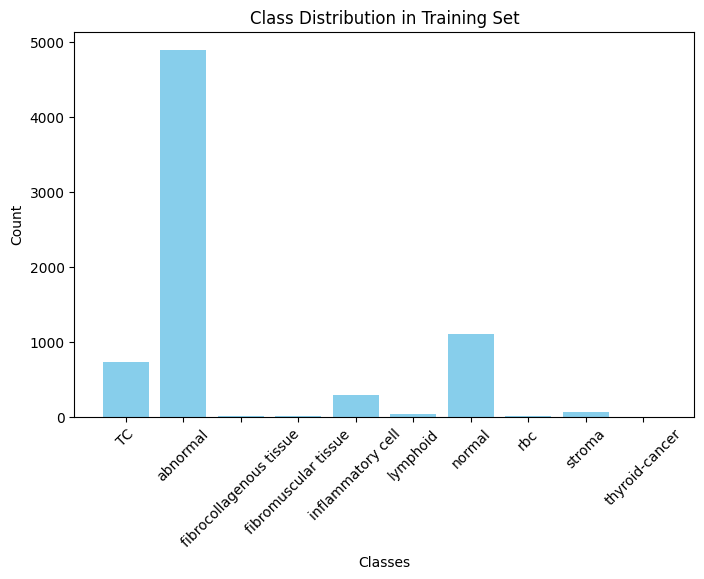

In [11]:
import yaml
import numpy as np
import matplotlib.pyplot as plt

# Load class names from data.yaml
yaml_path = os.path.join(dataset_path, "data.yaml")
with open(yaml_path, 'r') as f:
    data_yaml = yaml.safe_load(f)
class_names = data_yaml["names"]

# Count occurrences of each class
class_counts = {i: 0 for i in range(len(class_names))}

# Read all labels in train set
label_dir = os.path.join(dataset_path, "train", "labels")
for label_file in os.listdir(label_dir):
    with open(os.path.join(label_dir, label_file), "r") as f:
        for line in f.readlines():
            class_id = int(line.split()[0])
            class_counts[class_id] += 1

# Plot label distribution
plt.figure(figsize=(8, 5))
plt.bar(class_names, list(class_counts.values()), color="skyblue")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("Class Distribution in Training Set")
plt.xticks(rotation=45)
plt.show()


**Step 3: Image Visualization**
1. Load random sample images from train, val, test.
2. Overlay bounding boxes on images to verify label correctness.

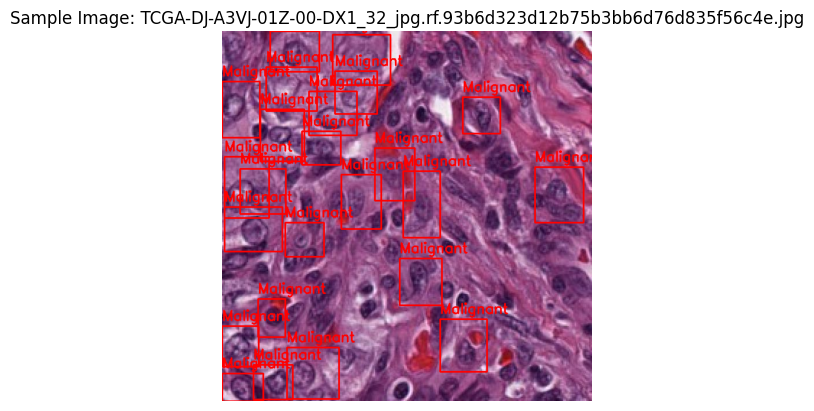

In [13]:
import os
import cv2
import random
import matplotlib.pyplot as plt

# Define class labels
class_names = ["Benign", "Malignant", "Other"]  # Update according to your dataset

# Set dataset path
dataset_path = "/kaggle/input/dataset1-thyroid-cancer"

def plot_sample_image(image_folder, label_folder):
    image_files = [f for f in os.listdir(image_folder) if f.endswith(".jpg")]
    random_image = random.choice(image_files)

    img_path = os.path.join(image_folder, random_image)
    label_path = os.path.join(label_folder, random_image.replace('.jpg', '.txt'))

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    # Draw bounding boxes
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f.readlines():
                class_id, x_center, y_center, width, height = map(float, line.strip().split())
                xmin, ymin = int((x_center - width / 2) * w), int((y_center - height / 2) * h)
                xmax, ymax = int((x_center + width / 2) * w), int((y_center + height / 2) * h)
                
                # Draw rectangle
                cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
                cv2.putText(img, class_names[int(class_id)], (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Sample Image: {random_image}")
    plt.show()

# Run for training set
plot_sample_image(os.path.join(dataset_path, "train", "images"), os.path.join(dataset_path, "train", "labels"))


**Step 4: Check for Missing/Corrupt Data**
1. Identify images without labels (or vice versa).
2. Detect and remove corrupt images.


In [14]:
from PIL import Image

def check_corrupt_images(image_folder):
    corrupted_files = []
    for file in os.listdir(image_folder):
        if file.endswith(".jpg"):
            img_path = os.path.join(image_folder, file)
            try:
                img = Image.open(img_path)
                img.verify()  # Verify if image is corrupted
            except Exception as e:
                corrupted_files.append(file)
    
    print(f"Corrupt Images: {len(corrupted_files)}")
    if corrupted_files:
        print(corrupted_files)

# Check for corrupt images in training set
check_corrupt_images(os.path.join(dataset_path, "train", "images"))


Corrupt Images: 0


**Next Steps After EDA**

Preprocessing: Resize images, normalize, clean missing data.
Data Augmentation: Apply transformations to increase dataset diversity.
Saving Processed Data: Store cleaned & augmented data for training

**Thyroid Cancer Image Preprocessing**

1. Resizing Images: Images are resized to a target size of 640×640.

   
3. Normalizing Pixel Values: Images are normalized to have pixel values between 0 and 1.

4. Copying Labels: Corresponding label files are copied to the processed folder.


In [25]:
import os
import cv2
from pathlib import Path
import shutil

# Set paths
raw_base = Path("/kaggle/input/dataset1-thyroid-cancer")
processed_base = Path("data/processed/dataset1")  # Final processed dataset

# Define splits to process
splits = ["train", "valid", "test"]
TARGET_SIZE = (640, 640)

def preprocess_image(image_path, target_size=TARGET_SIZE):
    """Resize image to target size and normalize pixel values."""
    img = cv2.imread(str(image_path))
    if img is None:
        print(f"Warning: Unable to read {image_path}")
        return None
    img = cv2.resize(img, target_size)
    # Normalize pixel values to [0, 1]
    img_norm = img.astype("float32") / 255.0
    return img_norm

for split in splits:
    # Define raw image and label directories for this split
    raw_img_dir = raw_base / split / "images"
    raw_label_dir = raw_base / split / "labels"
    
    # Define processed directories for this split
    proc_img_dir = processed_base / split / "images"
    proc_label_dir = processed_base / split / "labels"
    proc_img_dir.mkdir(parents=True, exist_ok=True)
    proc_label_dir.mkdir(parents=True, exist_ok=True)
    
    # Process images: resize and normalize, then save back as 8-bit image
    for img_file in raw_img_dir.glob("*.jpg"):
        processed_img = preprocess_image(img_file)
        if processed_img is not None:
            output_path = proc_img_dir / img_file.name
            cv2.imwrite(str(output_path), (processed_img * 255).astype("uint8"))
    
    # Copy label files (or add any cleaning steps if needed)
    for label_file in raw_label_dir.glob("*.txt"):
        target_file = proc_label_dir / label_file.name
        shutil.copy(label_file, target_file)
    
    print(f"Preprocessing for {split} split completed.")

print("All splits have been preprocessed and saved to", processed_base)


Preprocessing for train split completed.
Preprocessing for valid split completed.
Preprocessing for test split completed.
All splits have been preprocessed and saved to data/processed/dataset1


In [21]:
!pip install -U albumentations

**Training Data Augmentation**


augment the training images and corresponding label files to improve the diversity of the training dataset. The augmentation pipeline applies several transformations while preserving the integrity of the bounding box annotations in YOLO format (LIKE  normalized values). Below are the details of the steps and transformations:

* Source Data:

 The augmentation is applied on the processed training images and label files from step 1.
  
* Augmented Data Directories:

 Augmented images and labels are saved into separate directories:

* Augmentation Pipeline:


 The pipeline uses the Albumentations library with the following transformations:


1. Horizontal Flip (p=0.5): Randomly flips the image along the horizontal axis.
2. Rotation (limit=20, p=0.5): Rotates the image randomly within ±20 degrees.
3. Random Brightness/Contrast (p=0.3): Adjusts brightness and contrast to simulate various lighting conditions.
4. Gaussian Blur (blur_limit=(3, 7), p=0.3): Applies a Gaussian blur effect to mimic camera or focus variations.
5. Gauss Noise (var_limit=(10.0, 50.0), p=0.3): Adds random noise to the image, simulating sensor noise.

   All transformations are applied while maintaining the integrity of the YOLO-format bounding boxes through the use of bbox_params.


  * Augmentation Function:

 A custom function augment_image_and_labels reads an image and its corresponding label file, applies the transformations, and returns the augmented image along with updated bounding box coordinates and category IDs.



* Loop for Processing:

 Then iterates over each training image, applies the augmentation, and then:


1. Saves the augmented image.
2. Saves the augmented label file in YOLO format (each value formatted to 6 decimal places).






In [26]:
import cv2
import os
import albumentations as A
from pathlib import Path

# Directories for processed training data (from step 1)
proc_train_img_dir = processed_base / "train" / "images"
proc_train_label_dir = processed_base / "train" / "labels"

# Directories to save augmented training data
aug_train_img_dir = processed_base / "train_aug" / "images"
aug_train_label_dir = processed_base / "train_aug" / "labels"
aug_train_img_dir.mkdir(parents=True, exist_ok=True)
aug_train_label_dir.mkdir(parents=True, exist_ok=True)

# Define augmentation pipeline (YOLO format: normalized bboxes)
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.Rotate(limit=20, p=0.5),
    A.RandomBrightnessContrast(p=0.3),
    A.GaussianBlur(blur_limit=(3, 7), p=0.3),
    A.GaussNoise(var_limit=(10.0, 50.0), p=0.3),
], bbox_params=A.BboxParams(format="yolo", label_fields=["category_ids"]))

def augment_image_and_labels(image_path, label_path, transform):
    # Read image
    image = cv2.imread(str(image_path))
    h, w, _ = image.shape
    
    # Read bounding boxes from label file
    bboxes = []
    category_ids = []
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) == 5:
                    class_id, x_center, y_center, width, height = map(float, parts)
                    bboxes.append([x_center, y_center, width, height])
                    category_ids.append(int(class_id))
    
    # Apply augmentation
    transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
    aug_image = transformed["image"]
    aug_bboxes = transformed["bboxes"]
    aug_category_ids = transformed["category_ids"]
    
    return aug_image, aug_bboxes, aug_category_ids

# Loop through each training image and apply augmentation once (you can repeat for more diversity)
for img_file in proc_train_img_dir.glob("*.jpg"):
    label_file = proc_train_label_dir / img_file.with_suffix(".txt").name
    aug_img, aug_bboxes, aug_cat_ids = augment_image_and_labels(img_file, label_file, transform)
    
    # Save augmented image (convert back to BGR for cv2.imwrite if needed)
    # Note: If the image is still in RGB, convert it using cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR)
    output_img_path = aug_train_img_dir / f"aug_{img_file.name}"
    cv2.imwrite(str(output_img_path), aug_img)
    
    # Save augmented labels in YOLO format (with normalized values)
    output_label_path = aug_train_label_dir / f"aug_{img_file.with_suffix('.txt').name}"
    with open(output_label_path, "w") as f:
        for cid, bbox in zip(aug_cat_ids, aug_bboxes):
            # Format: class x_center y_center width height (6 decimal places)
            line = f"{cid} " + " ".join(f"{v:.6f}" for v in bbox) + "\n"
            f.write(line)

print("Augmentation for training split completed. Augmented data saved to", aug_train_img_dir)


Augmentation for training split completed. Augmented data saved to data/processed/dataset1/train_aug/images


In [33]:
!ls /kaggle/working/data/processed/dataset1

test  train  train_aug	valid


**Export Processed Dataset for Download**


Once the dataset has been preprocessed and augmented, we need to compress it into a ZIP file for easy download. The following steps will:

1. Compress the dataset into a ZIP archive.

3. Generate a downloadable link so you can retrieve the processed dataset.


In [34]:
!zip -r processed_dataset1.zip /kaggle/working/data/processed/dataset1

  adding: kaggle/working/data/processed/dataset1/ (stored 0%)
  adding: kaggle/working/data/processed/dataset1/train_aug/ (stored 0%)
  adding: kaggle/working/data/processed/dataset1/train_aug/images/ (stored 0%)
  adding: kaggle/working/data/processed/dataset1/train_aug/images/aug_TCGA-BJ-A2P4-01Z-00-DX1_643_jpg.rf.493b9610ba296419a56d6ce8ca5f138a.jpg (deflated 0%)
  adding: kaggle/working/data/processed/dataset1/train_aug/images/aug_TCGA-BJ-A4O9-01Z-00-DX1_848_jpg.rf.04ef602d3d5218a71055b5a46e448688.jpg (deflated 1%)
  adding: kaggle/working/data/processed/dataset1/train_aug/images/aug_TCGA-BJ-A2N7-01Z-00-DX1_577_jpg.rf.bd32c4398bf84fd694cec21e03f2d698.jpg (deflated 0%)
  adding: kaggle/working/data/processed/dataset1/train_aug/images/aug_TCGA-DJ-A3VK-01Z-00-DX1_723_jpg.rf.e75413e22d889d5c84e218d16e4a4629.jpg (deflated 3%)
  adding: kaggle/working/data/processed/dataset1/train_aug/images/aug_TCGA-BJ-A3EZ-01Z-00-DX1_131_jpg.rf.77f0817cc93cf2cd08f4a77e641bad64.jpg (deflated 0%)
  addin

In [36]:
from IPython.display import FileLink
FileLink(r'processed_dataset1.zip')

/kaggle/working/processed_dataset1.zip